In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

DEBUG = False

In [14]:
df = pd.read_csv("data/churn.csv")
display(df.shape)
df.head()

(3333, 16)

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no


no     2850
yes     483
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Breakdown of observations by Churn')

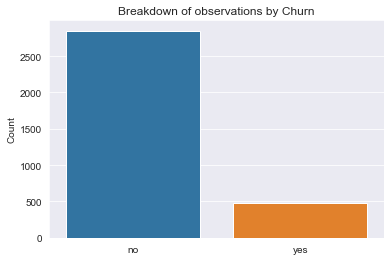

In [15]:
churn_values = df['Churn'].value_counts()
print(churn_values)
sns.barplot(churn_values.index, churn_values.values)
plt.ylabel('Count')
plt.title('Breakdown of observations by Churn')

This graph shows a clear imbalance with the data. As there is alot less True values compaired to the false. 2850/3333 are false which is about 85% of the data.

In [16]:
states_values = df['State'].value_counts().sort_values(ascending=True)
states = (states_values.keys())
frequency = states_values.values
y_pos = np.arange(len(frequency))
fig_size[0] = 12
fig_size[1] = 20
plt.subplot(1,2,1)
plt.title("Observations by State")
plt.barh(y_pos, frequency)
plt.ylabel("State")
plt.xlabel("Count")
plt.yticks(y_pos, states)
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = fig_size

churn_rate = ((df.loc[(df["Churn"]=='yes'),'State'].value_counts()) / (df["State"].value_counts()))
churn_state = states
rate = []
for x in states:
    rate.append(churn_rate[x])


y_pos = np.arange(len(rate))

plt.subplot(1,2,2)
plt.title("Churn rate by State")
plt.ylabel("State")
plt.xlabel("Churn")
plt.barh(y_pos, rate)
plt.yticks(y_pos, churn_state)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.show()

NameError: name 'fig_size' is not defined

These two graphs show no correlation between number of users per state and churn rate.

Area_Code  Churn
408        no        716
           yes       122
415        no       1419
           yes       236
510        no        715
           yes       125
dtype: int64


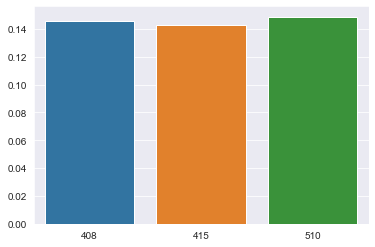

In [17]:
x = df.groupby(["Area_Code", "Churn"]).size()
yvalues = [x[1]/(x[0]+x[1]), x[3]/(x[2]+x[3]), x[5]/(x[4]+x[5])]
xvalues = [408,415,510]
print (x)
x.head()
sns.barplot(xvalues,yvalues)

This graph above shows the churn rate based on area code. Visually assessing the graph there dosent seem to be any variance between area codes. All area codes seem to have the same churn rate.

Intl_Plan  Churn
no         no       2664
           yes       346
yes        no        186
           yes       137
dtype: int64
[0.11495016611295682, 0.4241486068111455]


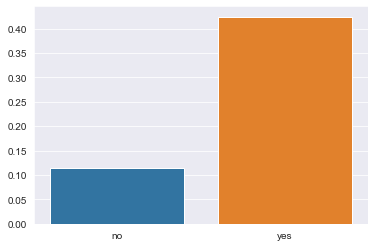

In [18]:
x = df.groupby(["Intl_Plan", "Churn"]).size()
print(x)
xvalues = ['no', 'yes']
yvalues = [x[1]/(x[0]+x[1]), x[3]/(x[2]+x[3])]
print(yvalues)
sns.barplot(xvalues, yvalues)

This graph shows that people who have an international plan are more likely to churn. Although there are alot less customer with international plans only 323/3333 customers have international plans.


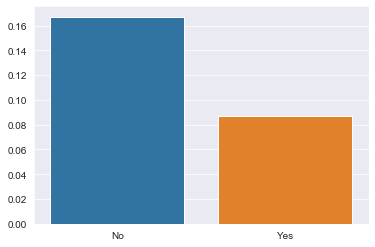

In [19]:
x = df.groupby(["VMail_Plan", "Churn"]).size()
x.head()
xvalues = ['No','Yes']
yvalues = [x[1]/(x[0]+x[1]), x[3]/(x[2]+x[3])]
sns.barplot(xvalues,yvalues)

This graph shows that customers with a voicemail plan are less likely to churn compaired to those with no vm plan.

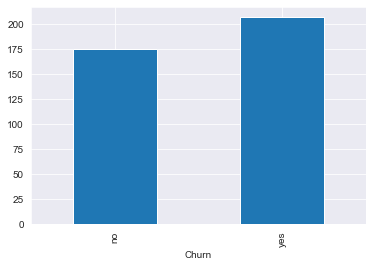

In [28]:
df.groupby('Churn').mean()['Day_Mins'].plot(kind='bar')

In this graph you can see that there is a chance that users with a higher total mins per day will churn.

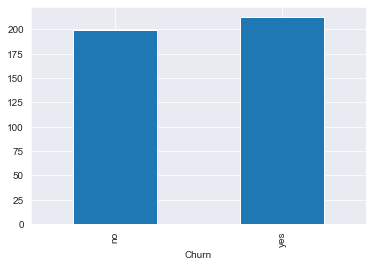

In [29]:
df.groupby('Churn').mean()['Eve_Mins'].plot(kind='bar')

From the graph above there dosent seem to be any indication on evening mins and churn rates.

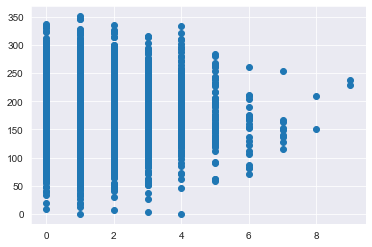

In [30]:
plt.scatter(df['Cust_Serv_Calls'], df['Day_Mins'])

Non linear relationship shows no relationship between variables.

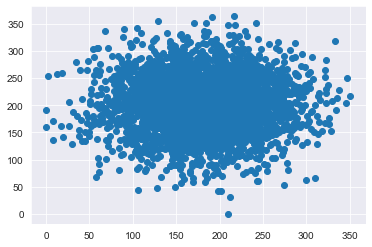

In [31]:
plt.scatter(df['Day_Mins'], df['Eve_Mins'])

With the random scattering of points this again shows no relationship between variables.

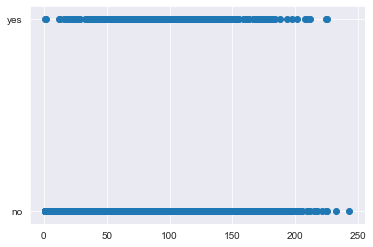

In [32]:
plt.scatter(df['Account_Length'], df['Churn'])

Non linear relationship shows no relationship between values

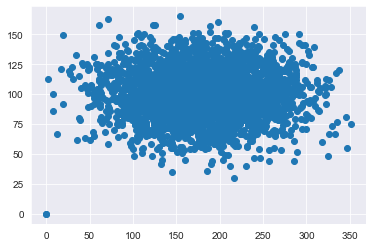

In [33]:
plt.scatter(df['Day_Mins'], df['Day_Calls'])

Random Scatter of Points show no relationship between variables.